<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/HUD_Assisted_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [9]:
!wget "https://www.huduser.gov/portal/datasets/pictures/files/US_2023_2020census.xlsx" -O "housing_data.xlsx"

--2025-08-19 12:49:34--  https://www.huduser.gov/portal/datasets/pictures/files/US_2023_2020census.xlsx
Resolving www.huduser.gov (www.huduser.gov)... 18.190.133.74, 3.17.214.238
Connecting to www.huduser.gov (www.huduser.gov)|18.190.133.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18116 (18K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘housing_data.xlsx’

housing_data.xlsx   100%[===================>]  17.69K  --.-KB/s    in 0s      

2025-08-19 12:49:34 (164 MB/s) - ‘housing_data.xlsx’ saved [18116/18116]



In [11]:
df = pd.read_excel("./housing_data.xlsx")
df.head()

gsl  states  entities  sumlevel                program_label  \
0  U.S. Total     NaN       NaN         1  Summary of All HUD Programs   
1  U.S. Total     NaN       NaN         1               Public Housing   
2  U.S. Total     NaN       NaN         1      Housing Choice Vouchers   
3  U.S. Total     NaN       NaN         1                    Mod Rehab   
4  U.S. Total     NaN       NaN         1      Project Based Section 8   

   program  sub_program                                    name code  \
0        1          NaN  U.S. Total,Summary of All HUD Programs   US   
1        2          NaN               U.S. Total,Public Housing   US   
2        3          NaN      U.S. Total,Housing Choice Vouchers   US   
3        4          NaN                    U.S. Total,Mod Rehab   US   
4        5          NaN      U.S. Total,Project Based Section 8   US   

   total_units  ...  tpct_ownsfd  fedhse  cbsa  place  latitude  longitude  \
0      5129585  ...           41     NaN   NaN    NaN       NaN        NaN   
1       886235  ...           37     NaN   NaN    NaN       NaN        NaN   
2      2752351  ...           44     NaN   NaN    NaN       NaN        NaN   
3        12928  ...           23     NaN   NaN    NaN       NaN        NaN   
4      1315607  ...           40     NaN   NaN    NaN       NaN        NaN   

   state  pha_total_units  ha_size    Quarter  
0    NaN              NaN      NaN 2023-12-31  
1    NaN              NaN      NaN 2023-12-31  
2    NaN              NaN      NaN 2023-12-31  
3    NaN              NaN      NaN 2023-12-31  
4    NaN              NaN      NaN 2023-12-31  

[5 rows x 74 columns]

In [13]:
condition = df['program_label'].isin(['Public Housing', 'Housing Choice Vouchers', 'Project Based Section 8'])
df = df[condition]

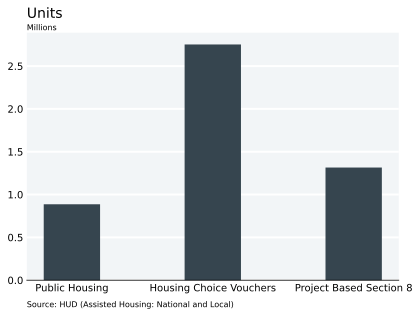

In [29]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(6, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.06, s='Units', transform=ax.transAxes, size=14)
ax.text(0., 1.01, s='Millions', transform=ax.transAxes, size=8)

ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)
plt.bar(df['program_label'], df['total_units']/1e6, width=0.4, color='#36454F')
ax.annotate("Source: HUD (Assisted Housing: National and Local)",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)
plt.show()
fig.savefig('./assisted_housing_counts.png')
plt.show()